# Ciência dos Dados - PROJETO 1

## Alfredo Simões Cassiano Acerbi

## COMPARANDO A SEGURANÇA ALIMENTAR ENTRE RORAIMA E SÃO PAULO

## Introdução

Meu projeto tem como objetivo comparar a situação alimentar da população dos estados de São Paulo e Roraima, respectivamente o maior e menor PIB do Brasil em 2013. Tendo em vista que o PIB pode ser considerado um bom indicador da pobreza e riqueza de um estado, pretendo entender como estes estados tão diferentes se comparam nesse aspecto da alimentação.

O projeto foi dividido em 3 partes, cada uma procurando responder certas perguntas.

A primeira parte responde a pergunta "Em qual dos dois estados os habitantes sofrem mais com a insegurança alimentar (já ficaram sem dinheiro para alimentaremm-se bem)? Como isso variou de 2009 para 2013?"

A segunda parte responde "Qual foi a diferença entre as atitudes tomadas pelos habitantes dos dois estados ao depararem-se com a falta de dinheiro para alimentarem-se?"

Por fim, a terceira parte responde "Como se caracterizam os domicilios estudados em cada estado, ou seja, como eles se diferenciam em relação a renda mensal per capita e presença de água canalizada? Estes fatores podem ter relação com a qualidade alimentar?"

## Preparação do código

In [351]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [352]:
#PNADs
arq = pd.read_csv('DOM2013_11.csv')
arq2009 = pd.read_csv('DOM2009_11.csv')


In [353]:
#criação da variável SM (renda em quantidade de salários mínimos) em 2013
arq['SM'] = (arq.V4621)/678
#criação da variável SM (renda em quantidade de salários mínimos) em 2009
arq2009['SM'] = (arq2009.V4621)/465


In [354]:
#filtrando a PNAD2013 para os estados de SP e RO, e também apenas para quem já ficou sem dinheiro para alimentação saudável

df = arq.loc[((arq.UF == 14)|(arq.UF == 35)) & (arq.V2107 == 1) & (arq.V4621<500000), ['UF', 'V4621', 'SM', 'V0211', 'V2107','V2138']]

df.columns = ['UF', 'RENDIMENTO', 'Rendimento_mensal_per_capita_por_SM', 'Agua_canalizada', 'Ficar_sem_din_p_alimentação_saudável', 'Principal_atitude']

#filtrando a PNAD2009 para os estados de SP e RO, e também apenas para quem já ficou sem dinheiro para alimentação saudável

df2009 = arq2009.loc[((arq2009.UF == 14)|(arq2009.UF == 35)) & (arq2009.V2107 == 1)  & (arq2009.V4621<500000), ['UF', 'V4621', 'SM', 'V0211', 'V2107']]

df2009.columns = ['UF', 'RENDIMENTO', 'Rendimento_mensal_per_capita_por_SM',  'Agua_canalizada', 'Ficar_sem_din_p_alimentação_saudável']




In [355]:
#nomeando as colunas para o dataframe2013

df.loc[df.UF == 14,'ESTADO'] = 'Roraima' 
df.loc[df.UF == 35,'ESTADO'] = 'São Paulo' 
df.loc[df.Ficar_sem_din_p_alimentação_saudável == 1 , 'Ficar_sem_din_p_alimentação_saudável'] = 'Sim' 
df.loc[df.Ficar_sem_din_p_alimentação_saudável == 3 , 'Ficar_sem_din_p_alimentação_saudável'] = 'Não'
df.loc[df.Agua_canalizada == 1 , 'Agua_canalizada'] = 'Sim'
df.loc[df.Agua_canalizada == 3 , 'Agua_canalizada'] = 'Não'

#nomeando as colunas para o dataframe2009

df2009.loc[df2009.UF == 14,'ESTADO'] = 'Roraima' 
df2009.loc[df2009.UF == 35,'ESTADO'] = 'São Paulo' 
df2009.loc[df2009.Ficar_sem_din_p_alimentação_saudável == 1 , 'Ficar_sem_din_p_alimentação_saudável'] = 'Sim' 
df2009.loc[df2009.Ficar_sem_din_p_alimentação_saudável == 3 , 'Ficar_sem_din_p_alimentação_saudável'] = 'Não' 
df2009.loc[df2009.Agua_canalizada == 1 , 'Agua_canalizada'] = 'Sim'
df2009.loc[df2009.Agua_canalizada == 3 , 'Agua_canalizada'] = 'Não'

## ANÁLISES

## Parte 1 - Dificuldade financeira para manter alimentação saudável em 2009 e 2013

In [356]:
df.UF.value_counts()
#186 pessoas entrevistadas de RO ficaram sem dinheiro para alimentação saudável, enquanto esse numero foi de 864 em SP em 2013

35    864
14    186
Name: UF, dtype: int64

In [357]:
df2009.UF.value_counts()
#221 pessoas entrevistadas de RO ficaram sem dinheiro para alimentação saudável, enquanto esse numero foi de 1723 em SP em 2009

35    1723
14     221
Name: UF, dtype: int64

In [358]:
arq.UF.value_counts()
#985 pessoas foram entrevistadas em RO e 16967 foram entrevistadas em SP em 2013

35    16967
31    13566
43    12263
29    11678
33    11169
26     9004
15     8628
23     7683
41     7443
52     6561
42     4406
13     3786
53     3592
51     3145
21     3144
32     3062
11     2836
50     2681
17     2490
28     2460
25     2379
22     2195
24     2085
27     1995
12     1559
14      985
16      935
Name: UF, dtype: int64

In [359]:
arq2009.UF.value_counts()

#818 pessoas foram entrevistadas em RO e 18030 foram entrevistadas em SP em 2009

35    18030
31    14415
29    14217
43    12487
33    12160
26     9415
23     9035
41     7605
15     7568
52     7049
42     4172
53     4014
51     3294
13     3061
32     3047
50     2988
25     2630
11     2456
21     2335
24     2333
28     2230
17     2101
27     2040
22     2008
12     1408
16      921
14      818
Name: UF, dtype: int64

In [360]:
x = (186*100)/985
print("A % dos entrevistados de RO que já ficaram sem $ para se alimentar de maneira saudável em 2013 é {0}" .format(x))

A % dos entrevistados de RO que já ficaram sem $ para se alimentar de maneira saudável em 2013 é 18.883248730964468


In [361]:
y = (933*100)/16967
print("A % dos entrevistados de SP que já ficaram sem $ para se alimentar de maneira saudável em 2013 é {0}" .format(y))

A % dos entrevistados de SP que já ficaram sem $ para se alimentar de maneira saudável em 2013 é 5.498909648140508


In [362]:
x2 = (221*100)/818
print("A % dos entrevistados de RO que já ficaram sem $ para se alimentar de maneira saudável em 2009 é {0}" .format(x2))

A % dos entrevistados de RO que já ficaram sem $ para se alimentar de maneira saudável em 2009 é 27.017114914425427


In [363]:
y2 = ( 1723*100)/18030
print("A % dos entrevistados de SP que já ficaram sem $ para se alimentar de maneira saudável em 2009 é {0}" .format(y2))

A % dos entrevistados de SP que já ficaram sem $ para se alimentar de maneira saudável em 2009 é 9.556295063782585


### Os dados acima mostram algo impactante, pois o percentual de entrevistados já ficaram sem dinheiro para se alimentar de maneira saudável é muito maior em Roraima. Também mostra uma grande variação entre 2009 e 2013. Vamos vizualizar melhor isso em 4 gráficos

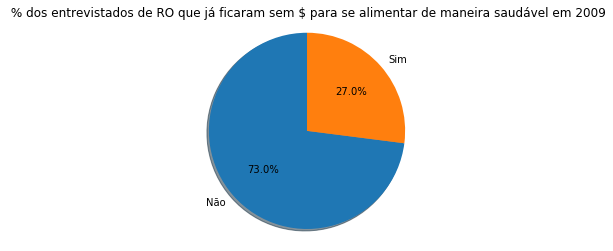

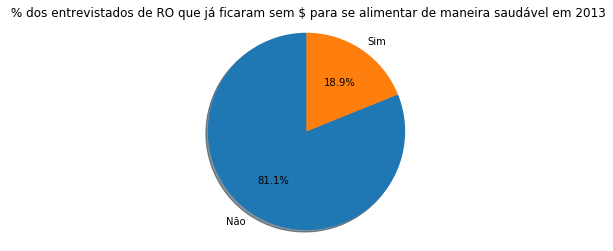

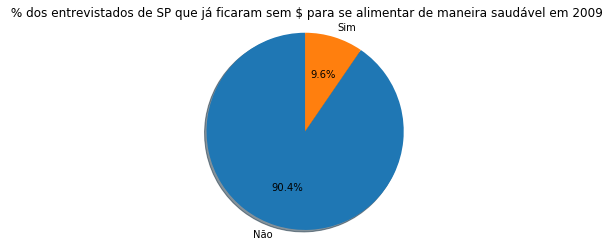

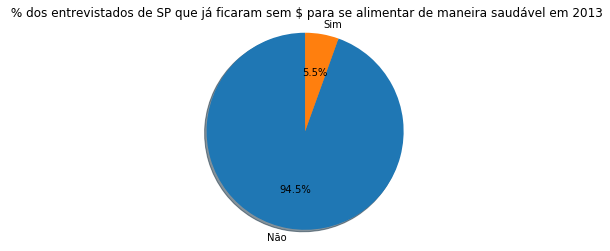

In [364]:

labels = 'Não', 'Sim'
sizes = [72.98288508557457,  27.017114914425427]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title(" % dos entrevistados de RO que já ficaram sem $ para se alimentar de maneira saudável em 2009")
plt.show()



labels = 'Não', 'Sim'
sizes = [81.11675126903553, 18.883248730964468]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title(" % dos entrevistados de RO que já ficaram sem $ para se alimentar de maneira saudável em 2013")
plt.show()




labels = 'Não', 'Sim'
sizes = [90.44370493621742,  9.556295063782585]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title(" % dos entrevistados de SP que já ficaram sem $ para se alimentar de maneira saudável em 2009")
plt.show()





labels = 'Não', 'Sim'
sizes = [94.50109035185949, 5.498909648140508]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title(" % dos entrevistados de SP que já ficaram sem $ para se alimentar de maneira saudável em 2013")
plt.show()


### Conclusão parcial Parte 1:

### Em ambos os estados, houve, de 2009 a 2013, uma diminuição no percentual de pessoas que deixaram de se alimentar de maneira saudável por não ter dinheiro. Porém, a diferença de pessoas que passam por essa situação é avassaladora: enquanto em SP o percentual foi de 9.9% (2009) para 5.5%(2013), em RO o numero era 27.3%(2009) e caiu para 19.2%





## Parte 2 - Vamos agora procurar saber melhor como agiram os que sofreram com falta de dinheiro para se alimentar  (apenas em 2013, pois a PNAD de 2009 não trabalhou com isso


In [365]:
df.Principal_atitude.value_counts()

1.0     181
3.0     106
4.0      77
15.0     60
14.0     38
5.0      32
9.0      31
2.0      23
12.0     21
10.0     18
6.0      13
11.0      5
13.0      4
7.0       4
8.0       1
Name: Principal_atitude, dtype: int64

In [366]:
#atitude em SP
dfsp=df.loc[(df.UF == 35)]
dfsp.Principal_atitude.value_counts()


1.0     157
3.0      86
4.0      71
15.0     34
5.0      29
14.0     25
9.0      20
10.0     18
12.0     17
2.0      16
6.0      11
11.0      5
13.0      4
8.0       1
Name: Principal_atitude, dtype: int64

In [367]:
#atitude em RO
dfro=df.loc[(df.UF == 14)]
dfro.Principal_atitude.value_counts()

15.0    26
1.0     24
3.0     20
14.0    13
9.0     11
2.0      7
4.0      6
12.0     4
7.0      4
5.0      3
6.0      2
Name: Principal_atitude, dtype: int64

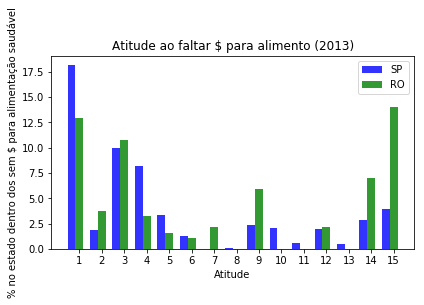

In [368]:
n_groups = 15

SP = [157,16,86,71,29,11,0,1,20,18,5,17,4,25,34]
RO = [24,7,20,6,3,2,4,0,11,0,0,4,0,13,26]

SPpor = []
for i in SP:
    n = (i*100)/864
    SPpor.append(n)
    
ROpor = []
for i in RO:
    n = (i*100)/186
    ROpor.append(n)

 

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, SPpor, bar_width,
                 alpha=opacity,
                 color='b',
                 label='SP')
 
rects2 = plt.bar(index + bar_width, ROpor, bar_width,
                 alpha=opacity,
                 color='g',
                 label='RO')
 
plt.xlabel('Atitude')
plt.ylabel('% no estado dentro dos sem $ para alimentação saudável')
plt.title('Atitude ao faltar $ para alimento (2013)')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15'))
plt.legend()
 
plt.tight_layout()
plt.show()

obs: a soma da porcentagem de cada estado é a porcentagem da amostra que passou fome que respondeu qual atitude tomou

### Índice de atitudes:
<p>1-Pediram alimentos emprestados a parentes, vizinhos e/ou amigos</p>
<p>2-Prestaram pequenos serviços a parentes e amigos em troca de alimentos</p>
<p>3-Compraram fiado</p>
<p>4-Deixaram de comprar alimentos supérfluos (biscoitos, refrigerantes, ...)</p>
<p>5-Comeram menos carnes</p>
<p>6-Comeram menos frutas, verduras e legumes</p>
<p>7-Foram pescar, caçar e colher frutos</p>
<p>8-Xeparam em feiras e mercados e aproveitaram alimentos</p>
<p>9-Procuraram emprego (emprego melhor ou um segundo emprego; pequenos serviços; um membro da família que não trabalhava arrumou emprego etc.)</p>
<p>10-Receberam ajuda de associação religiosa, igreja</p>
<p>11-Receberam ajuda do governo municipal, estadual, federal</p>
<p>12-Receberam alimentos da comunidade, vizinhos, parentes e amigos</p>
<p>13-Cadastraram-se em algum programa governamental de assistência social</p>
<p>14-Não fizeram nada</p>
<p>15-Pediram dinheiro emprestado</p>

### Conclusão parcial Parte 2: Pode-se observar formas de agir muito distintas entre os dois estados quando o assunto é que atitude tomar ao faltar dinheiro para se alimentar. Enquanto SP tem maior preferência por pedir alimentos emprestados a parentes, vizinhos e/ou amigos, a preferência dos habitantes de Roraima é pedir dinheiro emprestado, alternativa que não se mostra tão popular em SP

## Parte 3 - Traçando o perfil da residência dos que ficaram sem dinheiro para se alimentarem por uma variável quantitativa e uma qualitativa 

In [369]:
dfperfil = df.dropna()
df2009perfil = df2009.dropna()

df2009perfilsp = df2009perfil.loc[(df2009perfil.UF == 35)]
df2009perfilro = df2009perfil.loc[(df2009perfil.UF == 14)]

dfperfilsp = dfperfil.loc[(dfperfil.UF == 35)]
dfperfilro = dfperfil.loc[(dfperfil.UF == 14)]


### Variável qualitativa - Presença de água canalizada:

In [370]:
df2009perfilro.Agua_canalizada.value_counts(normalize=True)*100

Sim    91.855204
Não     8.144796
Name: Agua_canalizada, dtype: float64

In [371]:
df2009perfilsp.Agua_canalizada.value_counts(normalize=True)*100

Sim    97.962747
Não     2.037253
Name: Agua_canalizada, dtype: float64

In [372]:
dfperfilro.Agua_canalizada.value_counts(normalize=True)*100

Sim    91.666667
Não     8.333333
Name: Agua_canalizada, dtype: float64

In [373]:
dfperfilsp.Agua_canalizada.value_counts(normalize=True)*100

Sim    96.502058
Não     3.497942
Name: Agua_canalizada, dtype: float64

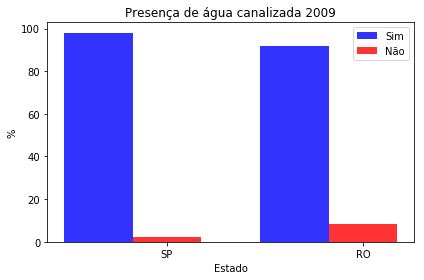

RO: Sim =  91.855204%, Não= 8.144796%
SP: Sim = 97.962747%, Não= 2.037253


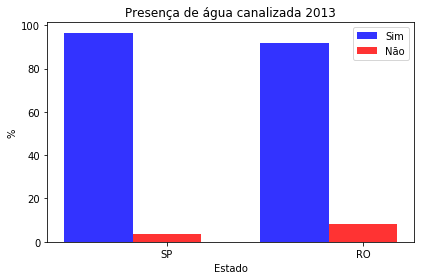

RO: Sim =  91.666667%, Não= 8.333333%
SP: Sim = 96.502058%, Não= 3.497942


In [374]:
al = 2
means_aguasim = (97.962747,  91.855204)
means_aguanao = (2.037253,8.144796)

 

fig, ax = plt.subplots()
index = np.arange(al)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_aguasim, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Sim')
 
rects2 = plt.bar(index + bar_width, means_aguanao, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Não')

 
plt.xlabel('Estado')
plt.ylabel('%')
plt.title('Presença de água canalizada 2009')
plt.xticks( index + bar_width, ('SP', 'RO'))
plt.legend()
 
plt.tight_layout()
plt.show()

print("RO: Sim =  91.855204%, Não= 8.144796%")
print("SP: Sim = 97.962747%, Não= 2.037253")



al = 2
means_aguasim2 = (96.502058,  91.666667)
means_aguanao2 = (3.497942, 8.333333)

 

fig, ax = plt.subplots()
index = np.arange(al)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_aguasim2, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Sim')
 
rects2 = plt.bar(index + bar_width, means_aguanao2, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Não')

 
plt.xlabel('Estado')
plt.ylabel('%')
plt.title('Presença de água canalizada 2013')
plt.xticks( index + bar_width, ('SP', 'RO'))
plt.legend()
 
plt.tight_layout()
plt.show()

print("RO: Sim =  91.666667%, Não= 8.333333%")
print("SP: Sim = 96.502058%, Não= 3.497942")


### Em relação à água canalizada, podemos observar que houve muita pouca mudança na porcentagem entre 2009 e 2013, tanto para Roraima quanto para São Paulo. Os 2 estados tiveram uma diminuição, praticamente insignificante, na porcentagem de moradias com água canalizada. Observa-se também que SP tem consideravelmente maior porcentagem de domicílios com água canalizada

### Variável quantitativa - Renda:

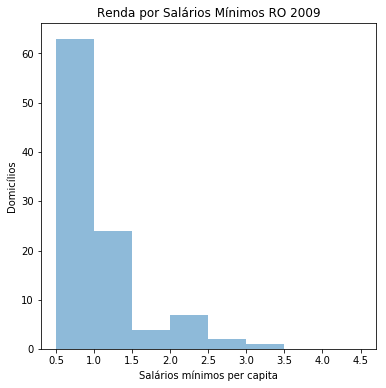

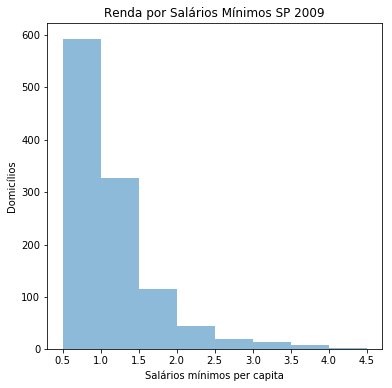

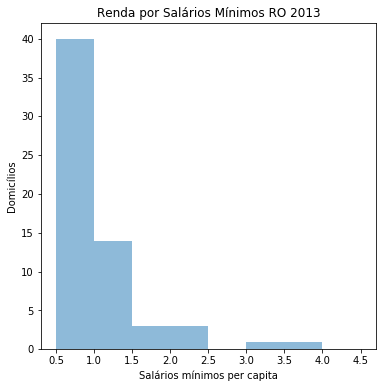

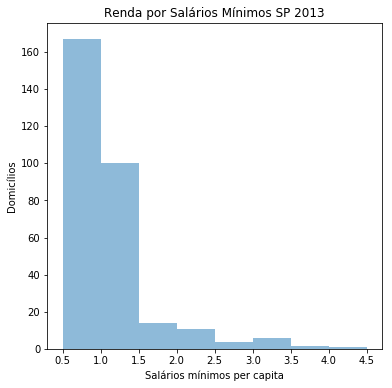

In [375]:
faixas=np.arange(0.5,5,0.5)



plot=df2009perfilro.Rendimento_mensal_per_capita_por_SM.plot.hist(bins=faixas, title='Renda por Salários Mínimos RO 2009', figsize=(6,6), alpha=0.5)
plt.ylabel('Domicílios')    
plt.xlabel('Salários mínimos per capita')    
plt.show()  

plot=df2009perfilsp.Rendimento_mensal_per_capita_por_SM.plot.hist(bins=faixas, title='Renda por Salários Mínimos SP 2009', figsize=(6,6), alpha=0.5)
plt.ylabel('Domicílios')    
plt.xlabel('Salários mínimos per capita')    
plt.show()  


plot=dfperfilro.Rendimento_mensal_per_capita_por_SM.plot.hist(bins=faixas, title='Renda por Salários Mínimos RO 2013', figsize=(6,6), alpha=0.5)
plt.ylabel('Domicílios')    
plt.xlabel('Salários mínimos per capita')    
plt.show()  


plot=dfperfilsp.Rendimento_mensal_per_capita_por_SM.plot.hist(bins=faixas, title='Renda por Salários Mínimos SP 2013', figsize=(6,6), alpha=0.5)
plt.ylabel('Domicílios')    
plt.xlabel('Salários mínimos per capita')    
plt.show()                                                    

## Conclusão Final

Ao longo do projeto, foram avaliadas dversas variáveis e suas relaçoes com a segurança alimentar nos estados de Roraima e São Paulo.

Resumindo, primeiramente a PNAD foi filtrada para trabalhar apenas com esses dois estados, e apenas com domicílios que ja tiveram problemas financeiros para se alimentar adequadamente.

Antes de de fato usar essa PNAD filtrada, foi descoberto algo muito impactante: o percentual de entrevistados que já ficaram sem dinheiro para se alimentar de maneira saudável é absurdamente maior em Roraima, comprovando que este estado sofre mais com a insegurança alimentar do que o estado de SP. Outra observação interessante foi a da expressiva melhora neste quesito, em ambos estados, de 2009 para 2013. (Ver mais informaçoes na "Parte 1"). 

Em uma próxima etapa, procurou-se saber melhor como agiram os que sofreram com falta de dinheiro para alimentarem-se, e comparar essas atitudes entre os estados. Muitas diferenças na maneira de proceder foram identificadas. As atitudes mais frequentes entre os paulistas são, em ordem: Pedir alimentos emprestados a parentes, vizinhos e/ou amigos, comprar fiado, deixar de comprar alimentos supérfluos e pedir dinheiro emprestado. Deixar de comprar alimentos supérfulos não é uma medida muito popular em Roraima, o que talvez indica um habito alimentar do estado. Já em roraima, as atitudes mais comuns em ordem são: Pedir dinheiro emprestado, pedir alimentos emprestados a parentes, vizinhos e/ou amigos, comprar fiado e simplesemnte não fazer nada, o que pode indicar uma menor preocupação com a falta de alimento por ser muito mais comum nesse estado ou por haver menos condiçoes de tomar outra atitude. Outro fato interessante é que os paulistas não costumam pedir dinheiro emprestado nessas situações. Por fim também vale ressaltar que a resposta "comer menos carne" foi pouco dada nesses 2 estados, assim infere-se que carne deve ser uma parte importante e cultural da alimentação destes locais.

Na ultima parte, verificou-se a diferença dos domcílios dos dois edtados nos fatores água canalizada e renda mensal per capita. Era esperado encontrar maiores diferenças, na minha opinião. A diferença de porcentagem de domicílios com agua canalizada em SP e RO manteve-se em aproximadamente 5% nos dois anos. É importnate apontar que não houve melhora nesse quesito entre 2009 e 2013 em nenhum dos estados. Também esperava-se maior diferença entre os histogramas de renda, devido á diferença de PIB entre os estados, porém a diferença não foi tão grande. Devido a isso, posso concluir que a diferença na segurança alimentar deve-se mais ao PIB do estado do que a renda do domicílio. Com a mesma renda, provavelmente, deve ser mais fácil ter segurança alimentar em SP do que em RO, visto a infraestrutura e as políticas públicas que podem ser mais eficientes com mais dinheiro.




obs: os NANs nao foram filtrados para a parte 1 e 2 do projeto, pois estava trabalhando apenas com o numero de pessoas que tinham insegurança alimentar frente ao total de pessoas, e meu dataframe filtrado continha apenas as pessoas que sofreram com insegurança alimentar. Filtar os Nans nesse caso não faria sentido pois eliminaria linhas devido a variavel que só foi usadaa na parte 3 (canalização da água). Ou seja, primeiramente tive uma visão geral de todos que sofreram segurança alimentar, não fazendo diferença nenhum outro aspecto. Depois, reduzi mais ainda meu dataframe para que contesse todas as colunas respondidas, pois usaria esse ultimo filtro apenas na parte 3.